In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt 
#import matplotlib.pyplot as plt
import seaborn as sn

In [2]:
df = pd.read_csv('annual-co2-emissions-per-country.csv')
df.head()

,Entity,Code,Year,Annual CO₂ emissions
0,Afghanistan,AFG,1949,14656.0
1,Afghanistan,AFG,1950,84272.0
2,Afghanistan,AFG,1951,91600.0
3,Afghanistan,AFG,1952,91600.0
4,Afghanistan,AFG,1953,106256.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29137 entries, 0 to 29136
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Entity                29137 non-null  object 
 1   Code                  23497 non-null  object 
 2   Year                  29137 non-null  int64  
 3   Annual CO₂ emissions  29137 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 910.7+ KB


In [4]:
df.isnull().sum()

Entity                     0
Code                    5640
Year                       0
Annual CO₂ emissions       0
dtype: int64

In [5]:
df["Entity"].unique()

array(['Afghanistan', 'Africa', 'Africa (GCP)', 'Albania', 'Algeria',
       'Andorra', 'Angola', 'Anguilla', 'Antarctica',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba', 'Asia',
       'Asia (GCP)', 'Asia (excl. China and India)', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bermuda',
       'Bhutan', 'Bolivia', 'Bonaire Sint Eustatius and Saba',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
       'Central African Republic', 'Central America (GCP)', 'Chad',
       'Chile', 'China', 'Christmas Island', 'Colombia', 'Comoros',
       'Congo', 'Cook Islands', 'Costa Rica', "Cote d'Ivoire", 'Croatia',
       'Cuba', 'Curacao', 'Cyprus', 'Czechia',
       'Democratic Republic of Congo', 'Denmark', 'Djibouti', 'Dominica',
       'Domini

### classifying the different entities into their different categories

-The entity column which is the main column holds information about continents,regional groupings, territories, income classification, global and special events.

In [6]:
classification = {
    "Continents":[ "Africa","Asia","Europe", "North America", "South America","Oceania","Antarctica"],
    "Africa": [
        "Algeria", "Angola", "Benin", "Botswana", "Burkina Faso", "Burundi",
        "Cape Verde", "Cameroon", "Central African Republic", "Chad", "Comoros",
        "Congo", "Cote d'Ivoire", "Democratic Republic of Congo", "Djibouti",
        "Egypt", "Equatorial Guinea", "Eritrea", "Eswatini", "Ethiopia", "Gabon",
        "Gambia", "Ghana", "Guinea", "Guinea-Bissau", "Kenya", "Lesotho", "Liberia",
        "Libya", "Madagascar", "Malawi", "Mali", "Mauritania", "Mauritius", "Morocco",
        "Mozambique", "Namibia", "Niger", "Nigeria", "Rwanda", "Sao Tome and Principe",
        "Senegal", "Seychelles", "Sierra Leone", "Somalia", "South Africa", "South Sudan",
        "Sudan", "Tanzania", "Togo", "Tunisia", "Uganda", "Zambia", "Zimbabwe"
    ],
    "Asia": [
        "Afghanistan", "Armenia", "Azerbaijan", "Bahrain", "Bangladesh", "Bhutan",
        "Brunei", "Cambodia", "China", "Cyprus", "Georgia", "India", "Indonesia",
        "Iran", "Iraq", "Israel", "Japan", "Jordan", "Kazakhstan", "Kuwait", "Kyrgyzstan",
        "Laos", "Lebanon", "Malaysia", "Maldives", "Mongolia", "Myanmar", "Nepal",
        "North Korea", "Oman", "Pakistan", "Palestine", "Philippines", "Qatar", "Russia",
        "Saudi Arabia", "Singapore", "South Korea", "Sri Lanka", "Syria", "Taiwan",
        "Tajikistan", "Thailand", "Timor-Leste","East Timor", "Turkey", "Turkmenistan",
        "United Arab Emirates", "Uzbekistan", "Vietnam", "Yemen"
    ],
    "Europe": [
        "Albania", "Andorra", "Austria", "Belarus", "Belgium", "Bosnia and Herzegovina",
        "Bulgaria", "Croatia", "Czechia", "Denmark", "Estonia", "Finland", "France",
        "Germany", "Greece", "Hungary", "Iceland", "Ireland", "Italy", "Kosovo", "Latvia",
        "Liechtenstein", "Lithuania", "Luxembourg", "Malta", "Moldova", "Montenegro",
        "Netherlands", "North Macedonia", "Norway", "Poland", "Portugal", "Romania",
        "San Marino", "Serbia", "Slovakia", "Slovenia", "Spain", "Sweden", "Switzerland",
        "Ukraine", "United Kingdom", "Vatican City"
    ],
    "North America": [
        "Antigua and Barbuda", "Bahamas", "Barbados", "Belize", "Canada", "Costa Rica",
        "Cuba", "Dominica", "Dominican Republic", "El Salvador", "Grenada", "Guatemala",
        "Haiti", "Honduras", "Jamaica", "Mexico", "Nicaragua", "Panama",
        "Saint Kitts and Nevis", "Saint Lucia", "Saint Vincent and the Grenadines",
        "Trinidad and Tobago", "United States"
    ],
    "South America": [
        "Argentina", "Bolivia", "Brazil", "Chile", "Colombia", "Ecuador", "Guyana",
        "Paraguay", "Peru", "Suriname", "Uruguay", "Venezuela"
    ],
    "Oceania": [
        "Australia", "Fiji", "Kiribati", "Marshall Islands", "Micronesia (country)",
        "Nauru", "New Zealand", "Palau", "Papua New Guinea", "Samoa", "Solomon Islands",
        "Tonga", "Tuvalu", "Vanuatu"
    ],
    "Antarctica": [
        "Antarctica"
    ],
    "Regional Groupings": [
        "Africa (GCP)", "Asia (GCP)", "Asia (excl. China and India)", "Central America (GCP)",
        "Europe (GCP)", "Europe (excl. EU-27)", "Europe (excl. EU-28)", "European Union (27)",
        "European Union (28)", "Middle East (GCP)", "North America (GCP)", 
        "North America (excl. USA)", "Oceania (GCP)", "South America (GCP)", "OECD (GCP)",
        "Non-OECD (GCP)"
    ],
    "Territories": [
        "Anguilla", "Aruba", "Bermuda", "British Virgin Islands", "bonaire sint eustatius and saba","Christmas Island",
        "Cook Islands", "Curacao", "Faroe Islands", "French Polynesia", "Greenland",
        "Hong Kong", "Macao", "Montserrat", "New Caledonia", "Niue",
        "Saint Pierre and Miquelon", "Sint Maarten (Dutch part)", "Turks and Caicos Islands",
        "Wallis and Futuna"
    ],
    "Income Classifications": [
        "High-income countries", "Low-income countries", "Lower-middle-income countries",
        "Upper-middle-income countries"
    ],
    "Global": [
        "World", "International aviation", "International shipping"
    ],
    "Special Events": [
        "Kuwaiti Oil Fires (GCP)", "Ryukyu Islands (GCP)"
    ]
}

In [7]:
def classify_entity(entity):
    for region, countries in classification.items():
        if entity in countries:
            return region
    return 'Unknown'


# Apply the classification to the DataFrame
df['Region'] = df['Entity'].apply(classify_entity)

# Save the updated DataFrame to a CSV file
df.to_csv('classified_countries.csv', index=False)

# Print the updated DataFrame
df.head(100)

,Entity,Code,Year,Annual CO₂ emissions,Region
0,Afghanistan,AFG,1949,14656.0,Asia
1,Afghanistan,AFG,1950,84272.0,Asia
2,Afghanistan,AFG,1951,91600.0,Asia
3,Afghanistan,AFG,1952,91600.0,Asia
4,Afghanistan,AFG,1953,106256.0,Asia
...,...,...,...,...,...
95,Africa,NaN,1904,8910848.0,Continents
96,Africa,NaN,1905,10262864.0,Continents
97,Africa,NaN,1906,11717472.0,Continents
98,Africa,NaN,1907,12930256.0,Continents


### Global CO₂ Emissions Over Time
-Shows the total worldwide emissions trend from the earliest to the latest year.

-Reveals long-term trends, acceleration, and potential plateaus in global emissions.

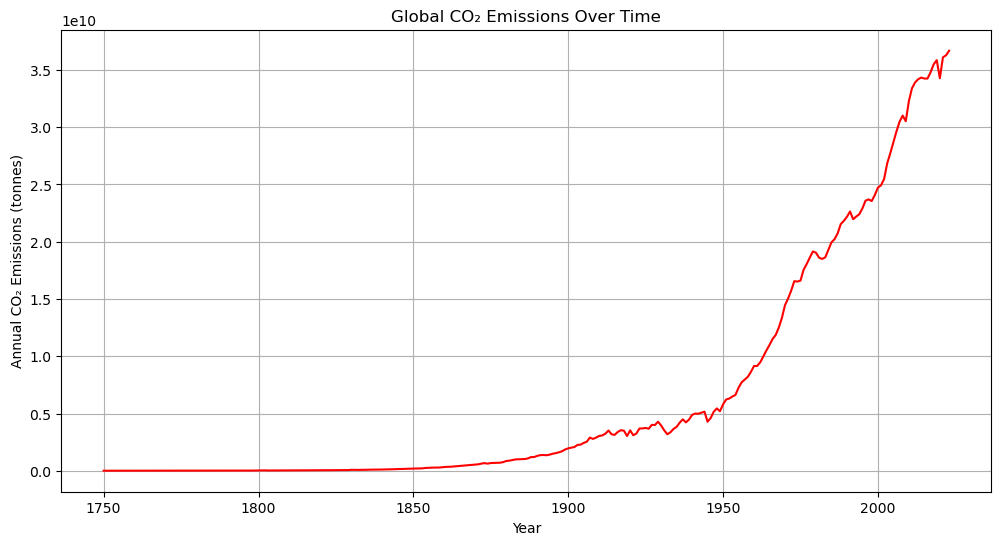

In [8]:

df = pd.read_csv('classified_countries.csv')

# Filter only total continental/global entries (optional)
global_df = df[df['Region'] == 'Continents'].groupby('Year')['Annual CO₂ emissions'].sum().reset_index()

plt.figure(figsize=(12, 6))
plt.plot(global_df['Year'], global_df['Annual CO₂ emissions'], color='red')
plt.title('Global CO₂ Emissions Over Time')
plt.xlabel('Year')
plt.ylabel('Annual CO₂ Emissions (tonnes)')
plt.grid(True)
plt.show()

### Top 10 Emitting Countries (2023)
-Bar plot of the top 10 countries with the highest emissions in the most recent year.

-Insight: Identifies the largest contributors to current emissions

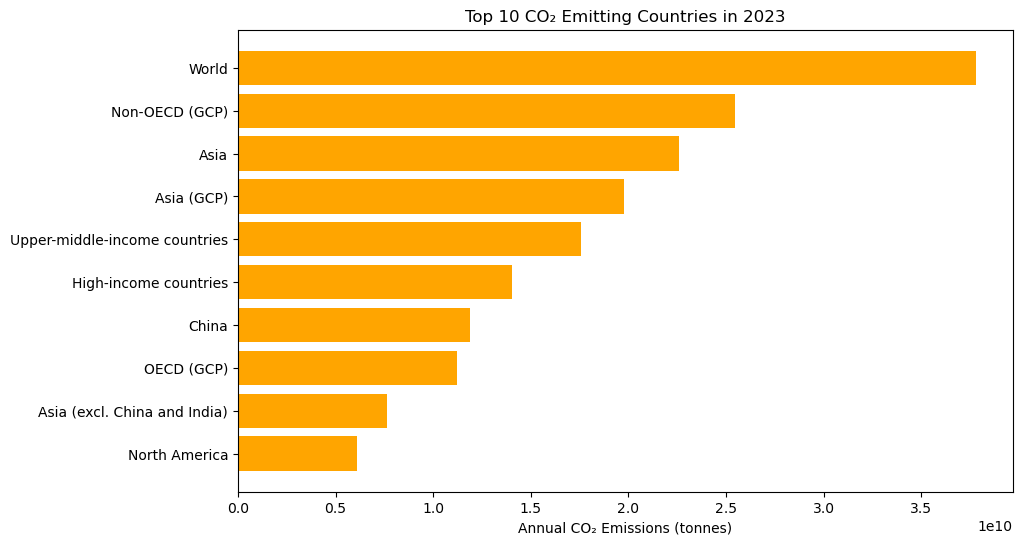

In [9]:
latest_year = df['Year'].max()
latest_data = df[df['Year'] == latest_year]
top10 = latest_data.nlargest(10, 'Annual CO₂ emissions')

plt.figure(figsize=(10, 6))
plt.barh(top10['Entity'], top10['Annual CO₂ emissions'], color='orange')
plt.xlabel('Annual CO₂ Emissions (tonnes)')
plt.title(f'Top 10 CO₂ Emitting Countries in {latest_year}')
plt.gca().invert_yaxis()
plt.show()

### Emissions by Region (2023)

-Pie chart showing the proportion of emissions by region in the latest year.

-Highlights which regions are responsible for the majority of emissions.



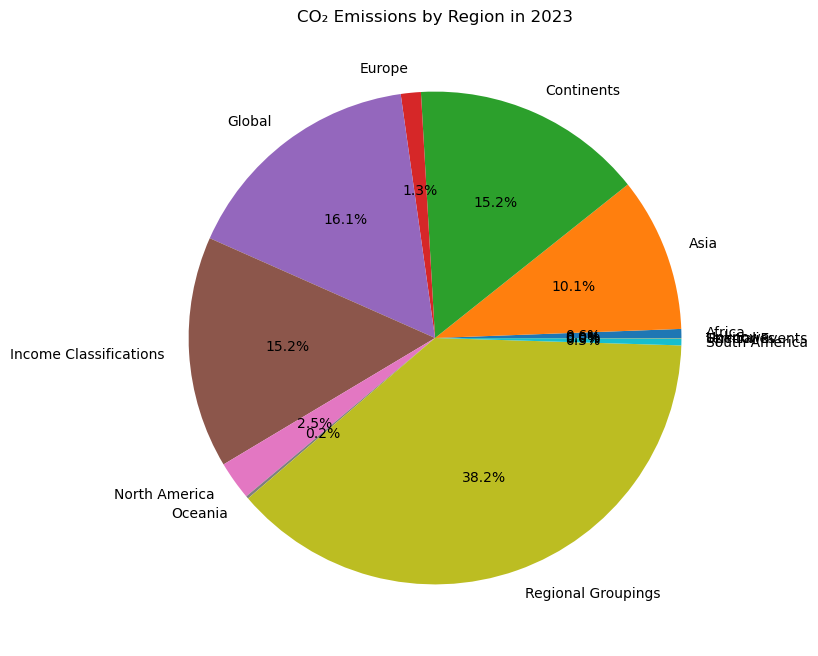

In [10]:
region_emissions = latest_data.groupby('Region')['Annual CO₂ emissions'].sum()

plt.figure(figsize=(8, 8))
plt.pie(region_emissions, labels=region_emissions.index, autopct='%1.1f%%')
plt.title(f'CO₂ Emissions by Region in {latest_year}')
plt.show()

## Emissions Trend for Selected Countries
-Time series of emissions for specific countries (e.g., China, USA, India).

-Compares historical trends and growth patterns of major emitters.



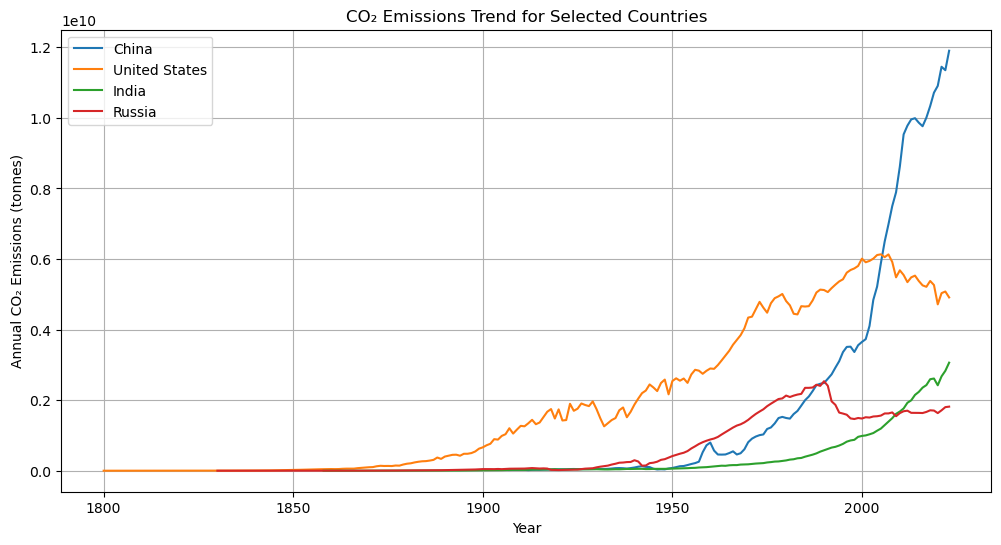

In [11]:
countries = ['China', 'United States', 'India', 'Russia']
selected = df[df['Entity'].isin(countries)]

plt.figure(figsize=(12, 6))
for country in countries:
    country_data = selected[selected['Entity'] == country]
    plt.plot(country_data['Year'], country_data['Annual CO₂ emissions'], label=country)

plt.title('CO₂ Emissions Trend for Selected Countries')
plt.xlabel('Year')
plt.ylabel('Annual CO₂ Emissions (tonnes)')
plt.legend()
plt.grid(True)
plt.show()

## Change in Emissions (1990 vs 2023)
Compares emissions for all countries between two years to show growth/decline.

-Shows which countries increased/decreased emissions relative to their past levels.



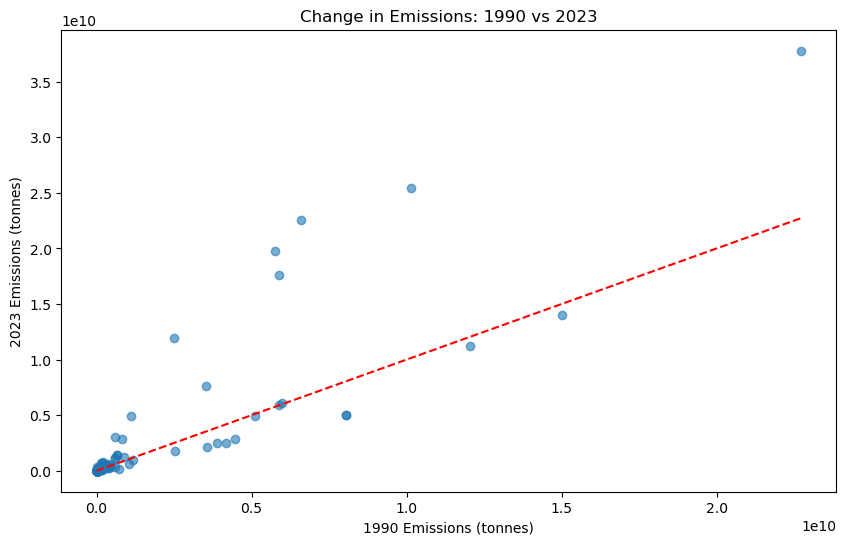

In [12]:
years = [1990, 2023]
compare = df[df['Year'].isin(years)].pivot(index='Entity', columns='Year', values='Annual CO₂ emissions').dropna()
compare['Change'] = compare[2023] - compare[1990]

plt.figure(figsize=(10, 6))
plt.scatter(compare[1990], compare[2023], alpha=0.6)
plt.plot([0, compare[1990].max()], [0, compare[1990].max()], 'r--')
plt.xlabel('1990 Emissions (tonnes)')
plt.ylabel('2023 Emissions (tonnes)')
plt.title('Change in Emissions: 1990 vs 2023')
plt.show()

In [14]:
#Filter the income classification and group by Region
y = df[(df['Year'] >= 2023) & (df['Region'] == "Income Classification")].groupby('Region')['Annual CO₂ emissions(tonnes)'].sum().reset_index()
print(y)
#Extract x and y for plotting
regions = y['Region']  # Regions for the y-axis
emissions = y['Annual CO₂ emissions(tonnes)']  # Emissions for the x-axis

# Create the plot
plt.figure(figsize=(10, 6))  # Set figure size
plt.barh(regions, emissions, color='orange')  # Horizontal bar chart
plt.xlabel('2023 CO₂ Emissions (tonnes)', fontsize=20)  # x-axis label
plt.ylabel('Region', fontsize=20)  # y-axis label
plt.title('2023 CO₂ Emissions by Continent', fontsize=25)  # Title

plt.grid(axis='x')  # Add grid lines for better readability
plt.show()

KeyError: 'Column not found: Annual CO₂ emissions(tonnes)'